# Starting out with scientific Python and notebooks
Created by Kyle Strom, edited by Sam Kraus. For further/expanded practice, see here: https://github.com/kstrm/Starting-out-with-python.git. 
<br>
<br>

Note: [ChatGPT](https://chatgpt.com/) and other AI can be very, very useful when troubleshooting code or looking up specific syntax. They are good tools, not necessarily replacements.

## Cell types

There are two basic cell types in notebooks
1. Markdown cells, and
2. Code cells

### Markdown Cells 

- Good for writting. Can use standard Markdown formatting (Google if you don't know how to use Markdown)
- Can use LaTeX formatting for equation (the notebook uses MathJax)

For example. Here is an equation inline: $F = ma$. And, here's an equation in display form:

$$ E = \frac{V^2}{2g}+y $$

You can also use standard LaTex "equation environment" in:

\begin{equation}
\frac{\partial (AC)}{\partial t}+\frac{\partial (AUC)}{\partial x}=\frac{\partial}{\partial x}\left(AD\frac{\partial C}{\partial x}\right) +  b \left(E_b - D_b \right)
\end{equation}

Equation reference in markdown is not yet available.

You can view the "raw guts" of a Markdown cell by double-clicking them. Try it with the above cell^. When looking at math or equations in Markdown, "$$" can be used to bracket text that will be in math format. This is very similar, if not the same, as LaTeX format.

### Code Cells

"Code" cell block are where the computations are actually performed. Before we get going with code, we'll need to load a few libraries.

## Loads: different ways to get access to what you need

Try typing 5+5 and executing the cell, then type "pi" or "sin(pi)" and execute. (Hint: pi and sin(pi) will not work these two cells)

In [1]:
5+5

10

In [2]:
pi

NameError: name 'pi' is not defined

In [3]:
sin(pi)

NameError: name 'sin' is not defined

As you can see, ```pi``` or ```sin``` are not available for use in standard base Python. That is, ```pi``` and ```sin``` don't necessarily mean anything on their own. They are just letters that you might use to define a variable.  To use them as mathematical operators you need to import libraries where these are specifically defined operations and values. The most common library for most scientific calculations is called [NumPy](https://numpy.org/). We need to load this to get access to common mathematical operations and other backbone components of scientific computing. Python has some built-in operators like ```+, -, /, *, **```. Most other things require something like NumPy.

There are different ways to load NumPy and other libraries to gain access. Here are some examples:

### Method 1a

In [4]:
import numpy as np

# now we can try taking the sin of pi by using np to refer to the numpy library and .pi and .sin as 
# the attributes of numpy called pi and sin

np.sin(np.pi)

np.float64(1.2246467991473532e-16)

### Method 1b
Here we load all of numpy as np, but then add some stuff directly so that we don't need the np. This is more of a personal preference choice. You can begin with "np." each time too.

In [5]:
import numpy as np
from numpy import pi, sin

# type just sin(pi) below:
sin(pi)

np.float64(1.2246467991473532e-16)

### Method 2 (the WRONG but easier way)
This method is okay for starting out. However, its good to move away from it in time. You can use ```%pylab``` to imports a bunch of stuff from numpy and matplotlib and make it easily accessible.

In [6]:
# the bulk bad form to do loads
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Other loads

In [7]:
# for interactive plotting we use the following:
# %matplotlib widget  # Will not work with Google Colab
from matplotlib import pyplot as plt # should work in Jupyter notebooks whether in Colab or not

# %config InlineBackend.figure_format='retina' # uncomment if you have a retina display... comment out when printing to pdf
import pandas as pd # will need for dataframes
from scipy.optimize import fsolve # will need for solver

## Variables and foundational types of data

### Variables

Variables are short hand names for different types of data that we can refer to later. Once you define a variable in a Jupyter notebook cell, it will carry its definition through the rest of the notebook. However, this does not hold true WITHIN function (more on that later).

In [8]:
var = 8
var

8

### Strings

In [9]:
var = 'Hello world'
var

'Hello world'

### Floats and integers

what if ```var = 1```?

In [11]:
var=1
var

1

Now try ```var = 1.5```

In [12]:
var=1.5
var

1.5

What happens when ```var = 1.```?

In [13]:
var=1.
var

1.0

## Commenting

Notice what the ```#``` mark does in a code block

In [14]:
2*var

2.0

In [15]:
# 2*var

You can toggle a line of code off any on by placing or removing ```#``` in front of the code. The keyboard shortcut for this in Mac is ```cmd+/``` and in Windows is ```ctrl+/```. Comments can be in the same line as code, but anything following the "#" will be comment and not run as code.

## Arrays

Arrays are very generic containers for numbers and strings. You can think of an array as a row or column from a spreadsheet (1D), the rows and columns of a spreadsheet (2D), or any number of multidimentional object with arrays within arrays within arrays. Arrays provide the backbone for most scientific operations. Below we will work with a basic one dimensional arrays. For more on Numpy arrays see - [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/).
<br>
<br>
REMEMBER: arrays in Python start counting from zero, not one!

In [16]:
# let's define a variable "N" as 10:
N = 10

In [17]:
x = np.linspace(1,10,N) # np.linspace() produces an array with N number of elements evenly spaced from 1 to 10... float points
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [18]:
x = np.zeros(N) # np.zeros() produces an array with N elements... floating point... all zeros
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
x = np.arange(N) # np.arange() produces an array with N elements... integers by default
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
x = np.arange(0,20,2) # np.arange() produces an array with N elements... at a specified interval 
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Now let's try indexing the arrays. Indices are not values in the array, but instead their positions. When indexing you can use commas between indices, or index a range with a colon. When indexing a range, the first index is inclusive and the second index is exclusive.

In [21]:
x[1:]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [22]:
x[:-1]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [23]:
x[2:5]

array([4, 6, 8])

In [24]:
dx = x[1:]-x[:-1] # note... this will produce an array with 9 points made up of the difference x[i+1]-x[i]
dx

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

Now your turn to try:

In [25]:
# 100 pt array that ranges from 0 to 10*pi in even increments (float)
x = np.linspace(0,10*pi,100)
print('x = \n', x)

x = 
 [ 0.          0.31733259  0.63466518  0.95199777  1.26933037  1.58666296
  1.90399555  2.22132814  2.53866073  2.85599332  3.17332591  3.4906585
  3.8079911   4.12532369  4.44265628  4.75998887  5.07732146  5.39465405
  5.71198664  6.02931923  6.34665183  6.66398442  6.98131701  7.2986496
  7.61598219  7.93331478  8.25064737  8.56797996  8.88531256  9.20264515
  9.51997774  9.83731033 10.15464292 10.47197551 10.7893081  11.10664069
 11.42397329 11.74130588 12.05863847 12.37597106 12.69330365 13.01063624
 13.32796883 13.64530142 13.96263402 14.27996661 14.5972992  14.91463179
 15.23196438 15.54929697 15.86662956 16.18396215 16.50129475 16.81862734
 17.13595993 17.45329252 17.77062511 18.0879577  18.40529029 18.72262289
 19.03995548 19.35728807 19.67462066 19.99195325 20.30928584 20.62661843
 20.94395102 21.26128362 21.57861621 21.8959488  22.21328139 22.53061398
 22.84794657 23.16527916 23.48261175 23.79994435 24.11727694 24.43460953
 24.75194212 25.06927471 25.3866073  25.7039398

In [26]:
# 100 pt array of integers ranging from 0 to 100 minus 1
xint = np.arange(0,100,1) # can also use xint = np.arange(100)
print('xint = \n', xint)

xint = 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [29]:
# returns the x values from spots 0, 1, 2 in the array
x[[0,1,2]]

array([0.        , 0.31733259, 0.63466518])

In [30]:
# returns the xint values from spots 0, 1, 2 in the array
xint[0:3]

array([0, 1, 2])

In [31]:
# create y1 as being the sin of x
y1 = np.sin(x)
# create y2 as y1 * xint
y2 = y1*xint
# create y3 as x^2: Note: Python syntax requires "**" for exponents, rather than "^".
y3 = x**2

You will notice in this notebook that variations of ```print()```, ```display()```, and simply typing the variable on the cell's last line are used to print the variable's value(s). 
- ```display()``` is used primarily for dataframes and can ensure the dataframes will print with column names in a tabular format.
- ```print()``` will pretty much print anything. 
- Simply typing a variable name on the last line and executing a code cell will also display a variable's value(s), but it has to be on the cell's last line. ```print()``` and ```display()``` do not have to be on the last line of the cell.

## For Loops

For loops take a defined set of things, iterates through them, names each iteration, each thing of the set as a variable, then opearates the same lines of code for each iteration. Usually this is iterating through an array or a range, naming each iteration as ```i```, then operating on ```i```. Or ```i``` could be an index in the range of an array's length. This can vary widely. After the first line of a for loop, an indent is used to keep everything in line within the loop. More can be found [here](https://www.w3schools.com/python/python_for_loops.asp).

In [32]:
# create a sequence of something to iterate through:
print('We will iterate through: ', range(0,N))

We will iterate through:  range(0, 10)


In [33]:
# a basic for loop structure 

for i in range(0,N): # note... the loop will stop one index before N since i would be out of range if i = N
    print(i)

0
1
2
3
4
5
6
7
8
9


In [34]:
# perform a simple operation each loop iteration
x_new = np.zeros(N)

for i in range(0,N):
    x_new[i] = i*2

x_new

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

## Dataframes

Dataframes are large multi-dimensional arrays of different datatypes, with indexed rows and named columns. Let's make a [Pandas](https://pandas.pydata.org/) dataframe from scratch - as opposed to loading it in from a csv file.

In [35]:
data = {
    'Org': ['USGS'] * 5,
    'Gage': [3171000] * 5,
    'Date': ['2021-06-24'] * 5,
    'Time': ['4:15', '4:30', '4:45', '5:00', '5:15'],
    'Zone': ['EDT'] * 5,
    'Q_cfs': [1000, 1300, 2000, 1500, 1200],
    'Type': ['A'] * 5,
    'DateTime': ['2021-06-24 4:15', '2021-06-24 4:30', '2021-06-24 4:45', '2021-06-24 5:00', '2021-06-24 5:15']
}

Q15_df = pd.DataFrame(data)

Q15_df

,Org,Gage,Date,Time,Zone,Q_cfs,Type,DateTime
0,USGS,3171000,2021-06-24,4:15,EDT,1000,A,2021-06-24 4:15
1,USGS,3171000,2021-06-24,4:30,EDT,1300,A,2021-06-24 4:30
2,USGS,3171000,2021-06-24,4:45,EDT,2000,A,2021-06-24 4:45
3,USGS,3171000,2021-06-24,5:00,EDT,1500,A,2021-06-24 5:00
4,USGS,3171000,2021-06-24,5:15,EDT,1200,A,2021-06-24 5:15


Let's take a look at the data type of each column:

In [36]:
Q15_df.dtypes

Org         object
Gage         int64
Date        object
Time        object
Zone        object
Q_cfs        int64
Type        object
DateTime    object
dtype: object

Note that the DateTime column is just a text object. It would be great if we could change this to a date-time format.

In [37]:
Q15_df['DateTime'] = pd.to_datetime(Q15_df['DateTime'], format='%Y-%m-%d %H:%M')
display(Q15_df)

,Org,Gage,Date,Time,Zone,Q_cfs,Type,DateTime
0,USGS,3171000,2021-06-24,4:15,EDT,1000,A,2021-06-24 04:15:00
1,USGS,3171000,2021-06-24,4:30,EDT,1300,A,2021-06-24 04:30:00
2,USGS,3171000,2021-06-24,4:45,EDT,2000,A,2021-06-24 04:45:00
3,USGS,3171000,2021-06-24,5:00,EDT,1500,A,2021-06-24 05:00:00
4,USGS,3171000,2021-06-24,5:15,EDT,1200,A,2021-06-24 05:15:00


In [38]:
Q15_df.dtypes

Org                 object
Gage                 int64
Date                object
Time                object
Zone                object
Q_cfs                int64
Type                object
DateTime    datetime64[ns]
dtype: object

Now we have a unique date and time associated with each discharge value.

## Plotting

Let's plot some data we created earlier:

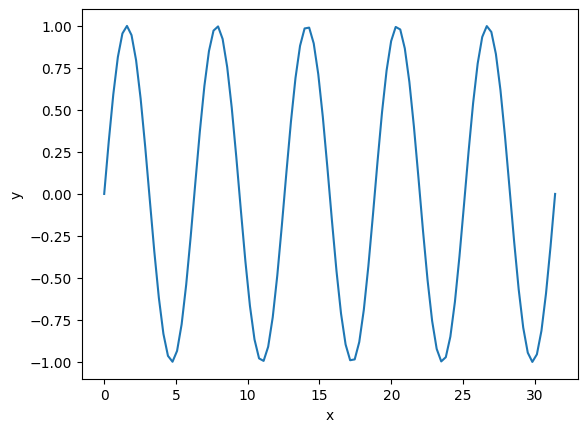

In [44]:
# plot y1 vs x

fig,ax = plt.subplots()
ax.plot(x,y1)
ax.set_xlabel('x')
ax.set_ylabel('y'); # this semicolon keeps some unnecessary text from printing - feel free to try running without it

Now try plotting the following based on each cell's comments:

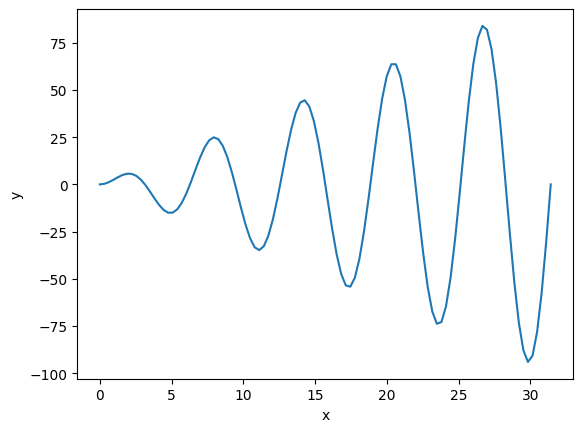

In [45]:
# plot y2 vs x
fig,ax = plt.subplots()
ax.plot(x,y2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show() # plt.show() is a way to ensure the plot is printed
plt.close() # plt.close() tells the computer you're done with this plot, any future plots won't get confused

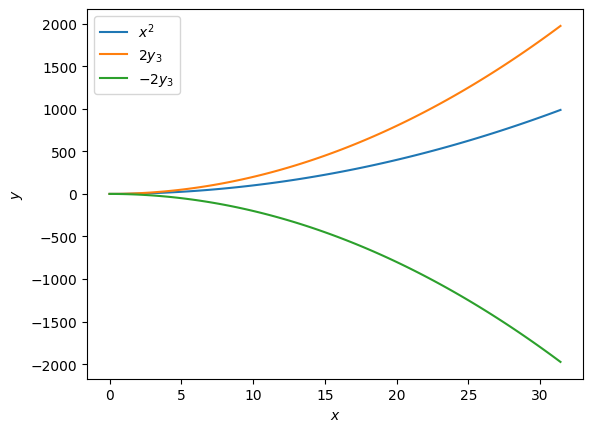

In [46]:
# plot several lines on the same figure

# plot x vs y3, x vs 2*y3, x vs -2*y3

fig,ax = plt.subplots()
ax.plot(x, y3, label = '$x^2$')
ax.plot(x, 2*y3, label = '$2y_3$')
ax.plot(x, -2*y3, label = '$-2y_3$')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(); # the semicolon just suppresses ```<matplotlib.legend.Legend ...>``` text from appearing in the notebook.

Plot the discharge data from our dataframe.

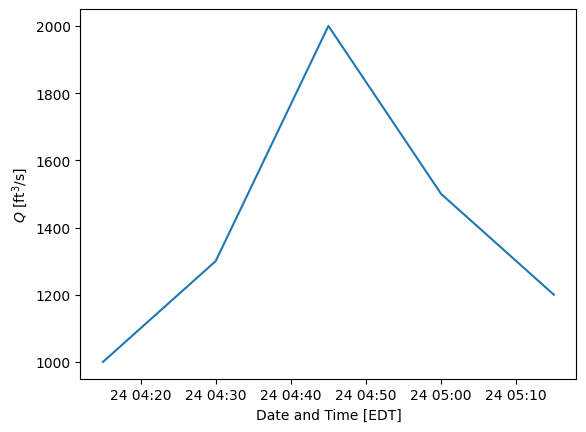

In [47]:
fig, ax1 = plt.subplots()
ax1.plot(Q15_df['DateTime'], Q15_df['Q_cfs'],alpha=1)
ax1.set_ylabel('$Q~\mathrm{[ft^3/s]}$')
ax1.set_xlabel('Date and Time [EDT]');

## Define a function

Functions are nice ways to operate on multiple arguments, without globally creating or storing variables. These arguments are not stored as variables outside of the function.

Let's define a very simple function for calculating the volume flow rate of water in a river. The volume flow rate tells you the volume of water flowing past a particular point in the river every second; e.g., 500 cubic feet per second. We typically refer to this important quantity with the variable, $Q$. One way in which we can define $Q$ is as the product of the average velocity of water in the river (how fast it's moving) multiplied by the cross sectional flow area (the area of water made by a 2D plane that intersection the bottom of the river at a perpendicular angle through which the water is flowing):

$$\text{Discharge = Velocity}~ x~ \text{Area} $$ 

or

$$ Q = VA$$

Now let's define a function that will give us $Q$ if we give it $A$ and $V$. After the first line of defining a function and its arguments, an indent is used to keep everything in line within the function. In the last line where it says "return", include a space following "return" and then the operation. Then run the function with its arguments in the same line as the print() statement. You can define the variables in line with the print statement or in the lines before calling the function.

In [62]:
def discharge(A,V):
    return V*A

# now use the function
A_1 = 232.47 # ft^2
V_1 = 2 # ft/s

# let's try some different types of print statements:
print('Discharge of the river =',discharge(A_1,V_1), 'ft^3/s.') # this is a simple print statement and works just fine!
print('Discharge of the river = {:.0f} cfs.'.format(discharge(A_1,V_1))) # alternate method for placing all printed variables in a list at the end
print(f'Discharge of the river = {discharge(A_1,V_1):.1f} cfs. Double this discharge would be {2*discharge(A_1,V_1):.1f} cfs.') # alternate method where you use f before ' then put the print variables directly in {}

Discharge of the river = 464.94 ft^3/s.
Discharge of the river = 465 cfs.
Discharge of the river = 464.9 cfs. Double this discharge would be 929.9 cfs.


## Solving an implicit equation: Manning's Equation.

We will use a defined function + ```fsolve``` to solve Manning's equation for normal depth in a trapezoidal channel:

$$ Q=\frac{c_0}{n}AR_h^{2/3}S^{1/2} $$

where,

$$ R_h = A/P_w $$

Goal: solve for depth $y$ given discharge $Q$, slope $S$, roughness coefficient $n$, unit system coefficient $c_0$, bottom width $b$, and side slope $m$.

We will use the ```fsolve``` function in scipy: ```f_solution = fsolve(defname, guess, args=(list))```

First, let's define the equation and set it up so that the function should return ```0``` if we get the right depth (i.e., subtract one side of the equation from the other). This is due to ```fsolve``` being a root solver. We need to make sure the variable we are solving for, $y$, is first in the function's arguments. Then, when we call all other arguments of the function in the call of fsolve. We will also need to have a starting guess at the solution.

In [63]:
def manning_normal_depth(y,Q,b,S,m,n,c0):
    A = (b + m*y)*y
    Pw = b+2*y*((1+m**2)**(1/2))
    Rh = A/Pw
    return (c0/n)*A*Rh**(2/3)*S**(1/2) - Q

In [64]:
# Channel conditions (inputs)

Q = 20 # m^3/s
S = 0.02 # m/m
n = 0.030
c0 = 1
b = 5 # m
m = 0

# need a guess value for normal depth, y

y0guess = 1.5

# now use fsolve to find the normal depth, y

y0_soln = fsolve(manning_normal_depth, y0guess, args=(Q,b,S,m,n,c0))

print('The normal depth, y0 =', np.round(y0_soln, 4), 'm')

The normal depth, y0 = [1.0416] m
